In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from heatmap import heatmap, corrplot
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score#, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import warnings

warnings.filterwarnings('ignore')

## Exploration

In [4]:
filename = '../data/Speed Dating Data - huge.xlsx'

csv = pd.ExcelFile(filename)
csv.sheet_names

['Date 1- clean', 'Speed Dating Data - huge']

In [5]:
date1 = pd.read_excel(filename, sheet_name='Date 1- clean')

display(date1.columns)

list(date1.columns)

Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'samerace', 'age_o',
       'race_o', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd',
       'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'exphappy', 'expnum'],
      dtype='object')

['iid',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'samerace',
 'age_o',
 'race_o',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum']

### _What sort of people match?_
 > Split data into train and test  
 > Identify missing data   
 > If more than half the data is missing remove that column 🤔   
 

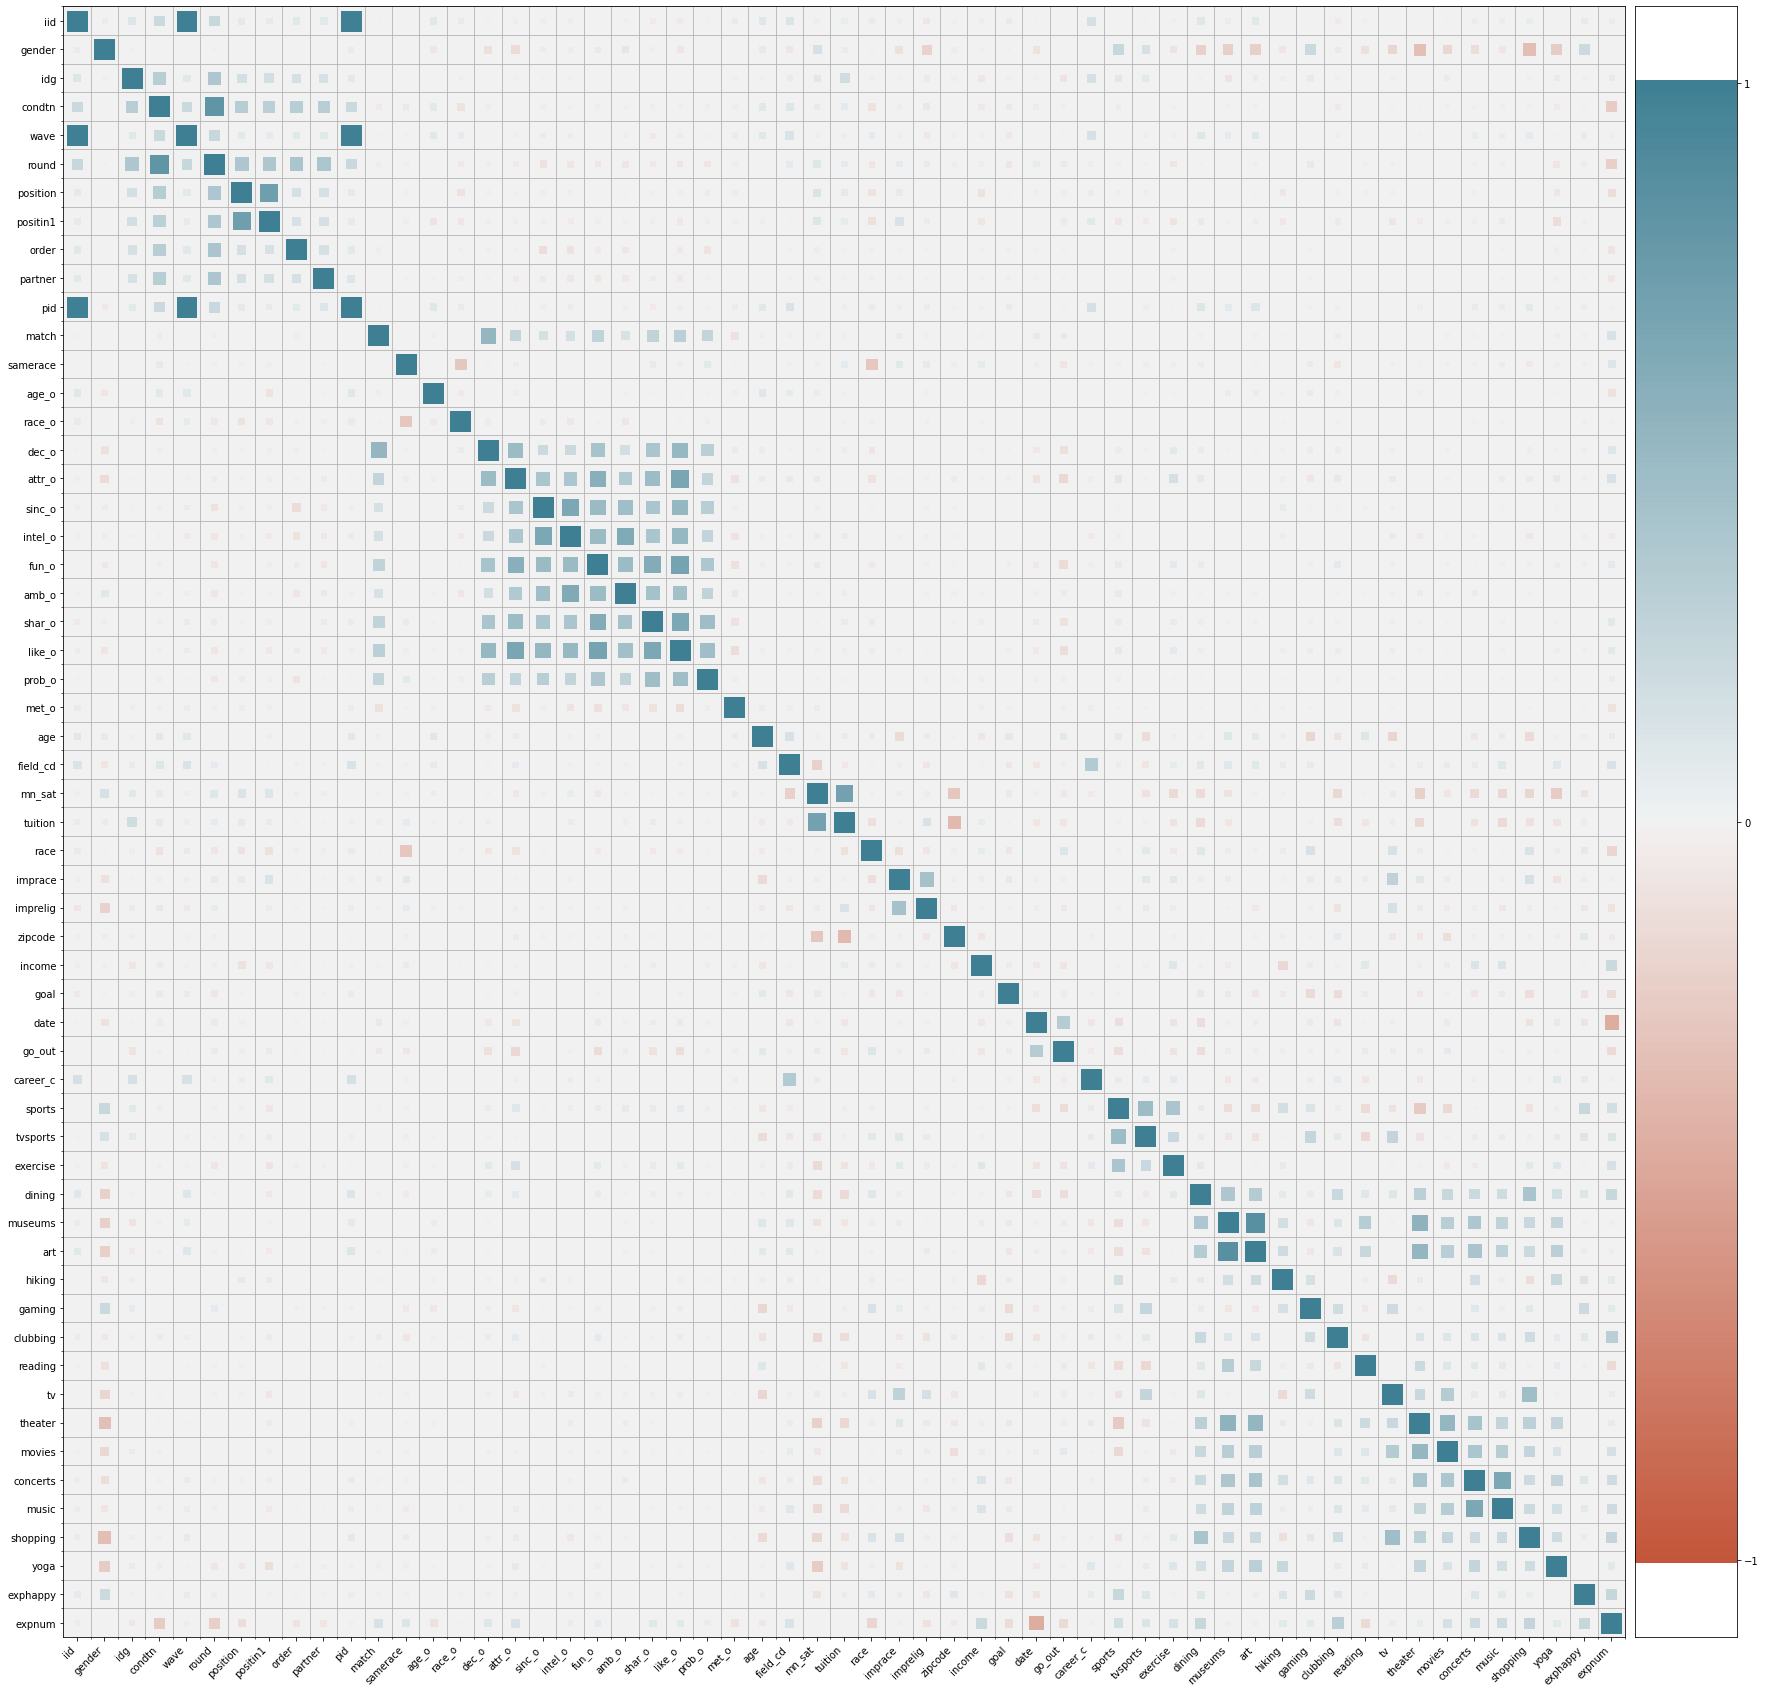

In [6]:
plt.figure(figsize=(30,30)) #size_scale=400, 
plt.grid(False)

corrplot(date1.corr(),size_scale=400)#, marker='8')

I want to use just the variables with meaningful correlation to 'match' since match is our goal.   
_What variables do I consider for this meaningful correlations?_   
 > - expnum   
 > - met_0   
 > - prob_0   
 > - like_0   
 > - shar_0    
 > - amb_0    
 > - fun_0    
 > - intel_0    
 > - sinc_0    
 > - attr_0    
 > - dec_0    


In [7]:
date_corr = date1[['expnum', 'met_o', 'prob_o', 'like_o', 'shar_o', 'amb_o', 'fun_o', 'intel_o', 'sinc_o', 'attr_o', 'dec_o', 'match' ]]

## Data To Visualize
 > - Save data as csv

In [8]:
date_corr = date_corr.fillna(0)

date_corr.to_csv('data_to_viz.csv')
date_corr.sample(4)

,expnum,met_o,prob_o,like_o,shar_o,amb_o,fun_o,intel_o,sinc_o,attr_o,dec_o,match
3819,0.0,2.0,6.0,6.0,6.0,6.0,8.0,8.0,10.0,5.0,1,0
1884,0.0,2.0,0.0,6.0,6.0,4.0,8.0,0.0,8.0,7.0,1,0
2332,0.0,2.0,4.0,7.0,0.0,0.0,8.0,8.0,8.0,8.0,0,0
7821,0.0,2.0,6.0,6.0,6.0,6.0,7.0,7.0,6.0,5.0,1,0


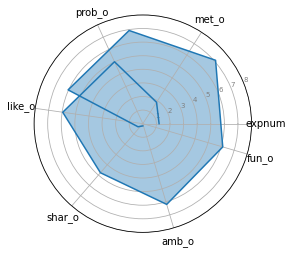

In [25]:
plt.polar(date_corr.mean())
plt.fill(date_corr.mean(), alpha=0.4)

#plt.xticks(list(date_corr.columns))

plt.yticks(color='grey', size=7)
plt.ylim(0,8)

plt.show()


## Model Building

In [9]:
training_data = date_corr.sample(frac=0.8, random_state=25)
testing_data  = date_corr.drop(training_data.index)

print('training count : %i \ntesting count : %i'%(training_data.shape[0], testing_data.shape[0])) 

training count : 6702 
testing count : 1676


<AxesSubplot:title={'center':'Percentage of Missing Data in Training data'}>

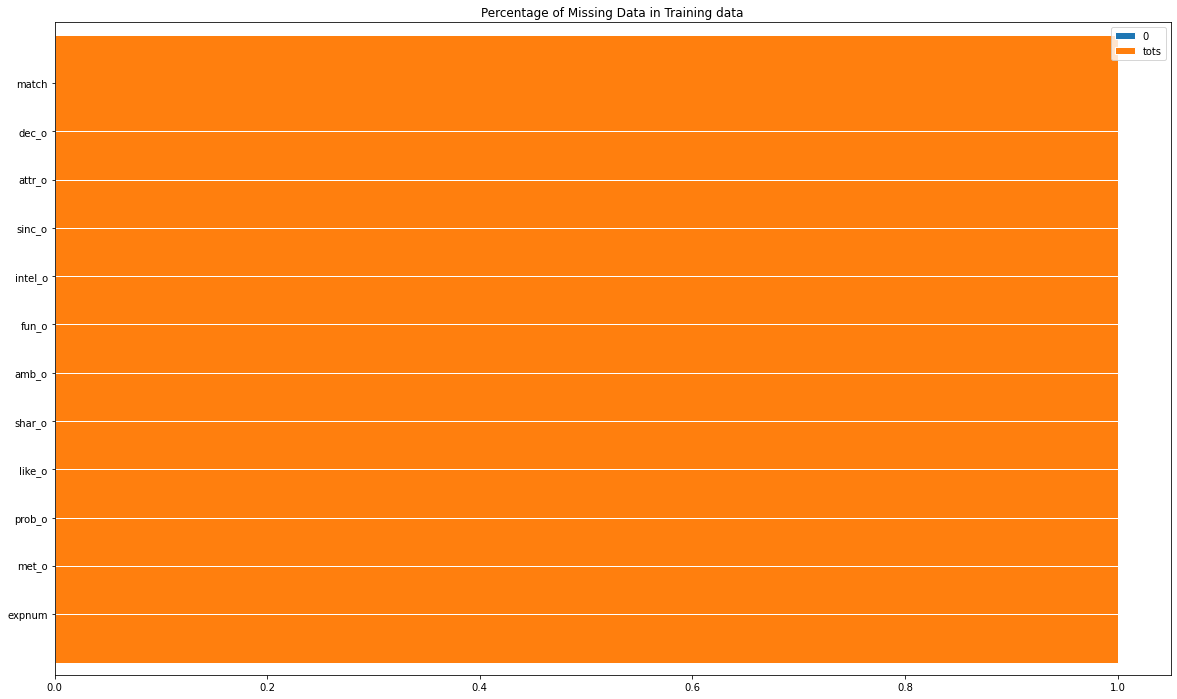

In [10]:
series_count = training_data.isna().mean().sort_values(ascending=False)

series_count = series_count.to_frame()

series_count['tots'] = 0.0000000
for i in range(len(series_count)):
    series_count['tots'][i]  = 1 - series_count[0][i]
    
#display(series_count.sort_values(by='tots'))
series_count.plot.barh(figsize=(20,12), stacked=True, linewidth=1, width= 2, edgecolor='white', title='Percentage of Missing Data in Training data')

,0,tots
expnum,0.0,1.0
met_o,0.0,1.0
prob_o,0.0,1.0
like_o,0.0,1.0
shar_o,0.0,1.0
amb_o,0.0,1.0
fun_o,0.0,1.0
intel_o,0.0,1.0
sinc_o,0.0,1.0
attr_o,0.0,1.0


<AxesSubplot:title={'center':'Percentage of Missing Data in Testing data'}>

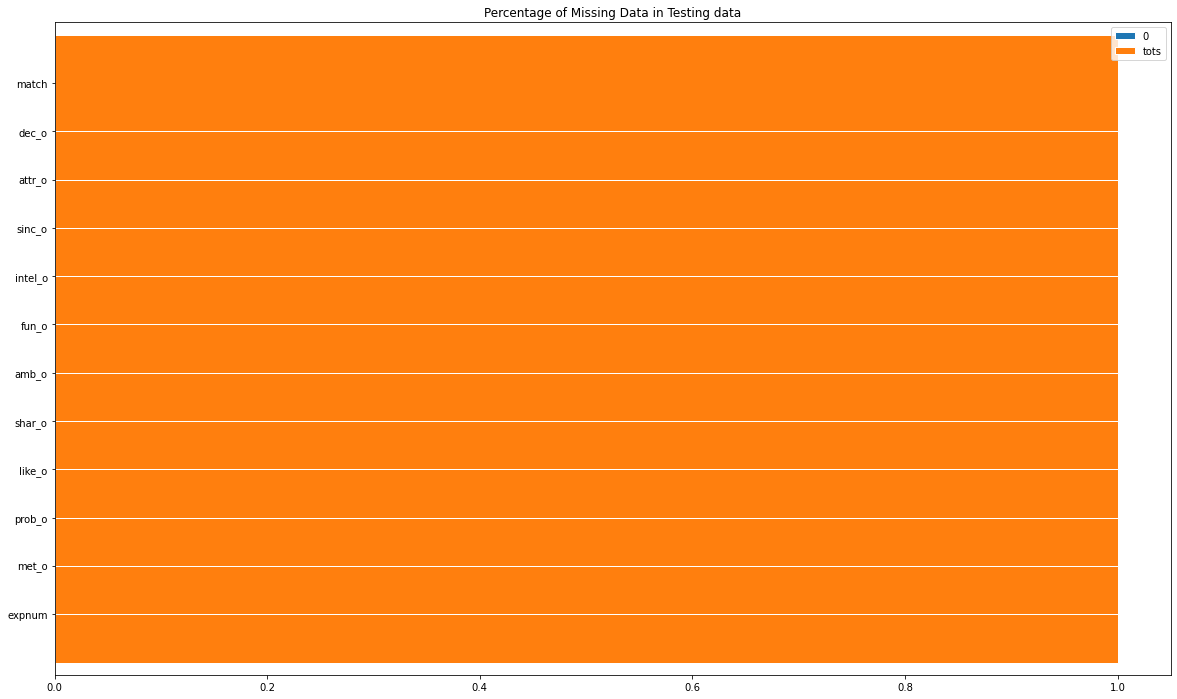

In [11]:
series_count = testing_data.isna().mean().sort_values(ascending=False)

series_count = series_count.to_frame()

series_count['tots'] = 0.0000000
for i in range(len(series_count)):
    series_count['tots'][i]  = 1 - series_count[0][i]
    
display(series_count.sort_values(by='tots'))
series_count.plot.barh(figsize=(20,12), stacked=True, linewidth=1, width= 2, edgecolor='white', title='Percentage of Missing Data in Testing data')

expnum has more than 75% of its data missing in the train and test datasets so we remove it   
I decided to fill the rest of the columns with median values

In [12]:
training_data.fillna(training_data.median(), inplace=True)
testing_data.fillna(testing_data.median(), inplace=True)

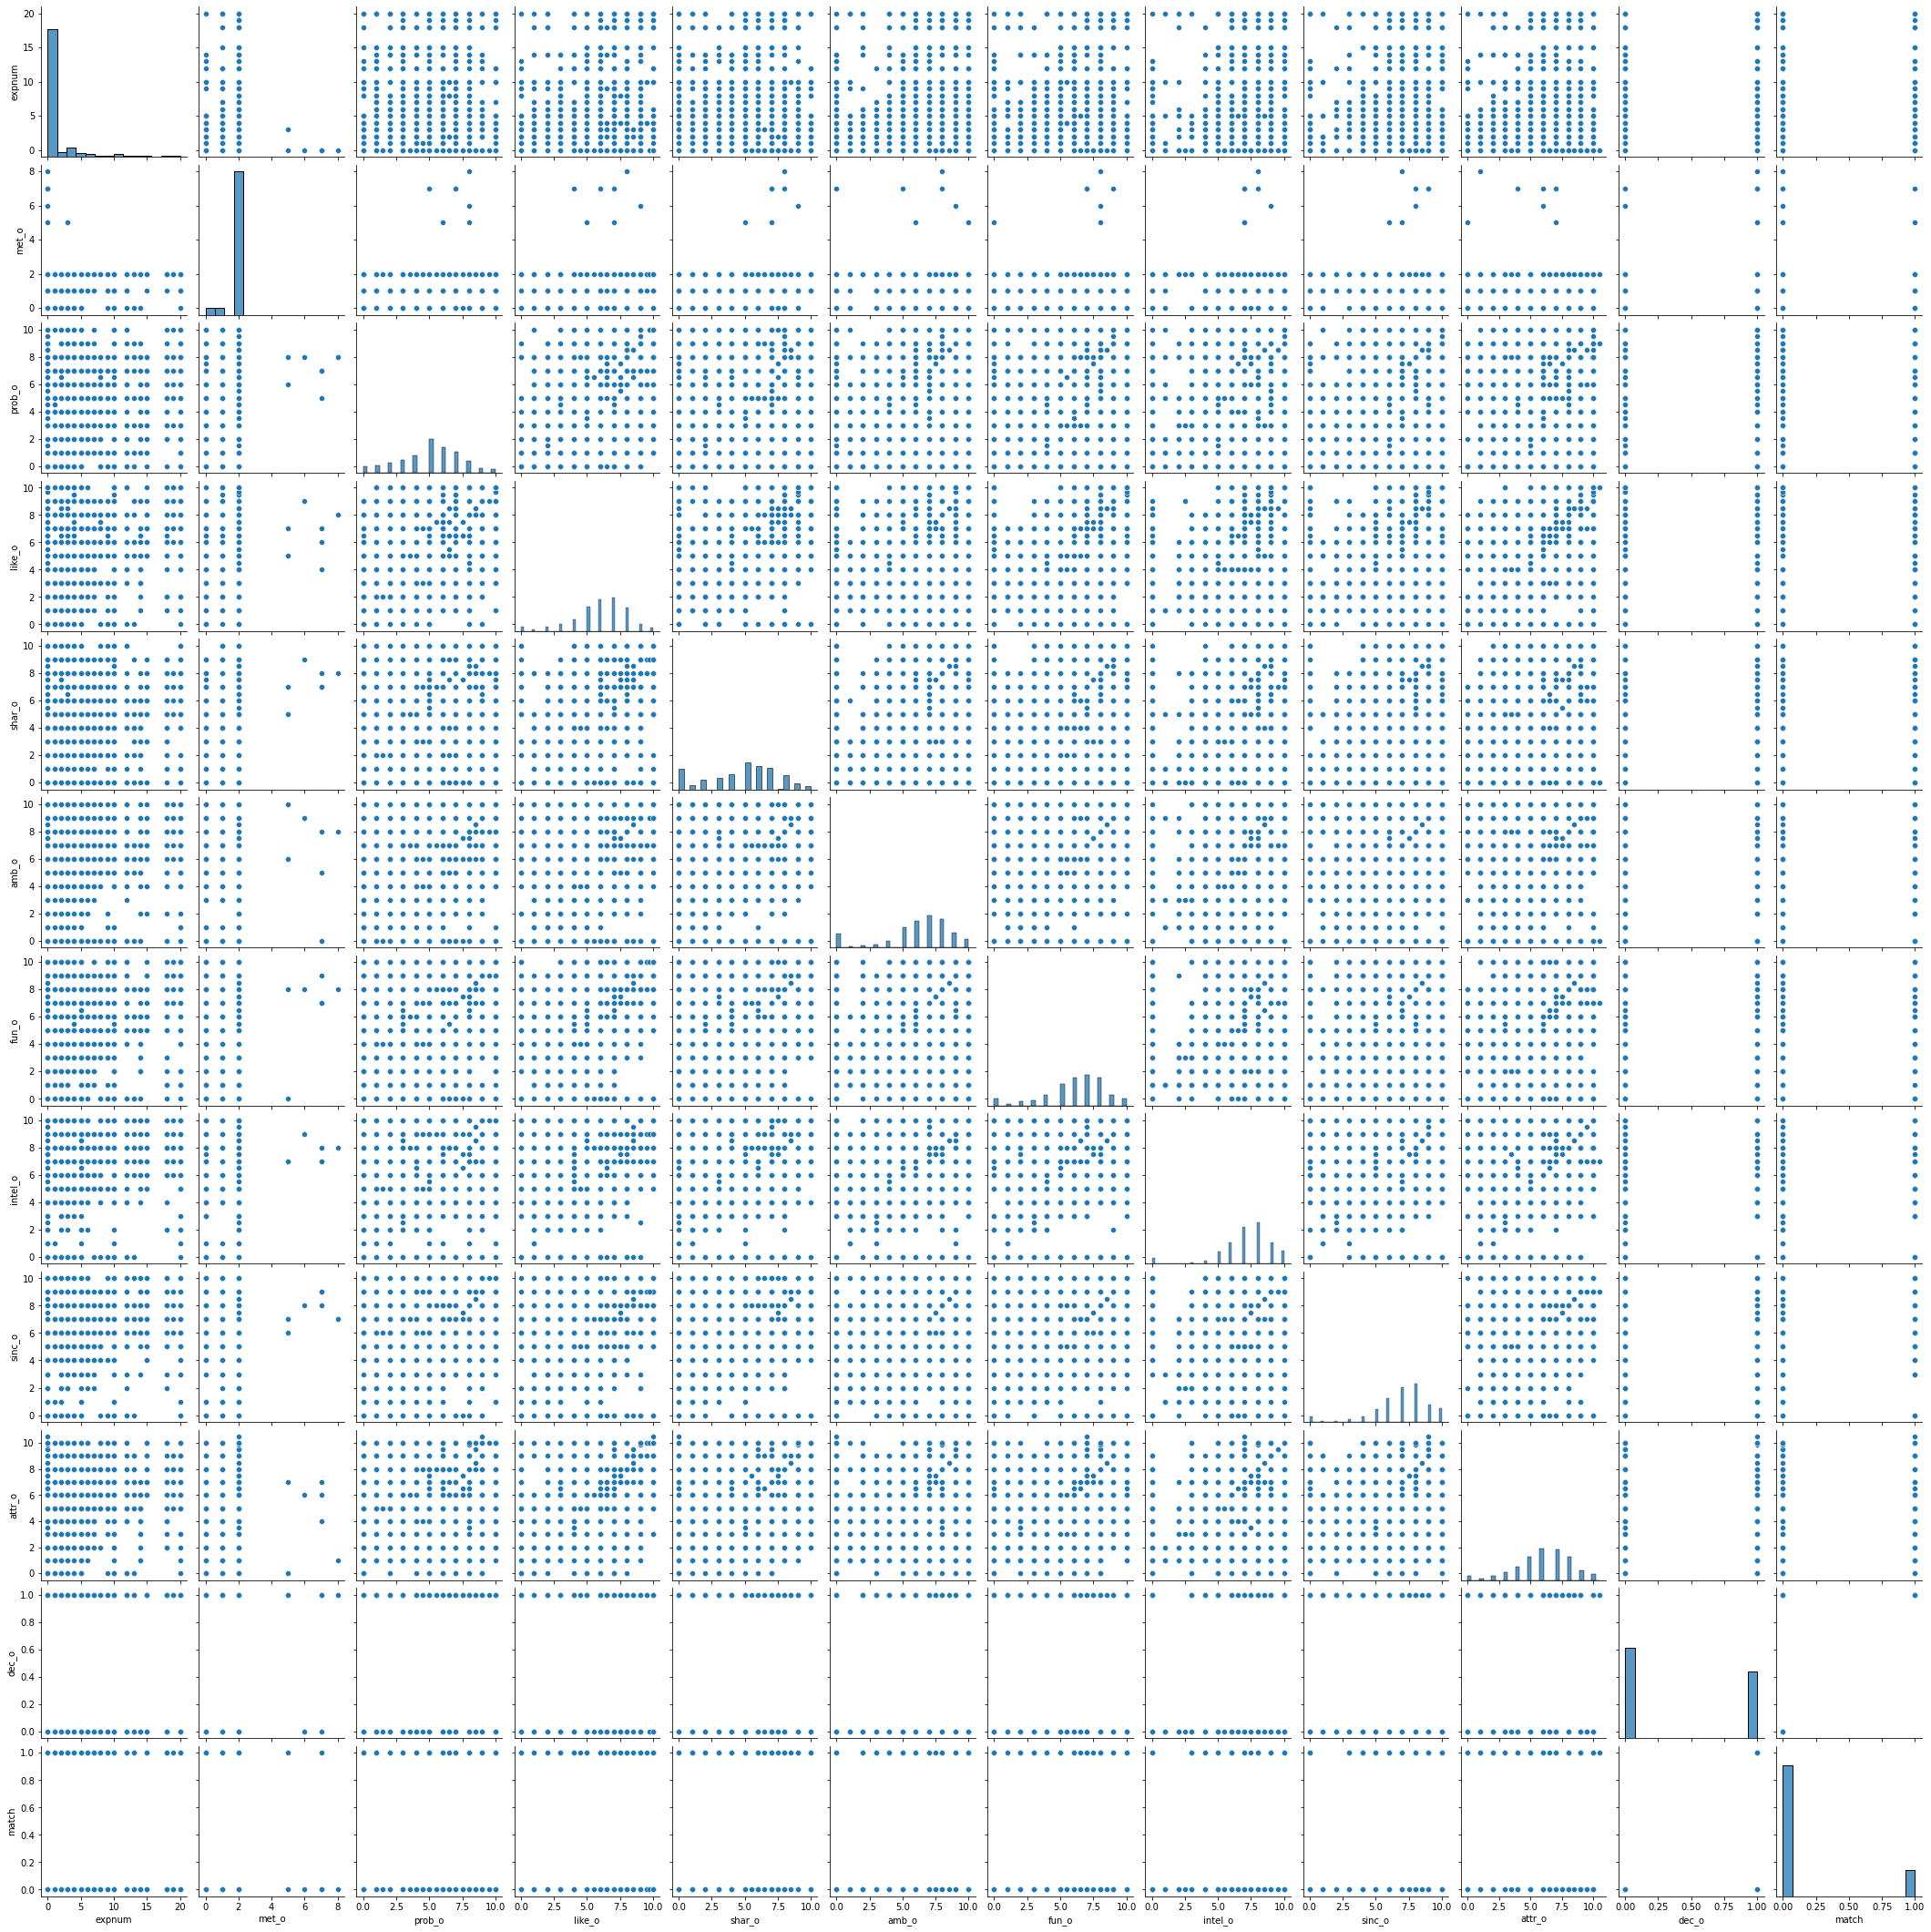

In [13]:
sns.pairplot(training_data)

In [14]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


In [15]:
training_data.sample(4)

,expnum,met_o,prob_o,like_o,shar_o,amb_o,fun_o,intel_o,sinc_o,attr_o,dec_o,match
7213,0.0,2.0,7.0,8.0,7.0,10.0,8.0,8.0,8.0,8.0,1,0
4859,0.0,2.0,6.0,6.0,5.0,6.0,6.0,7.0,6.0,6.0,0,0
94,10.0,2.0,6.0,6.0,0.0,8.0,7.0,9.0,9.0,6.0,1,0
3096,0.0,2.0,5.0,6.0,7.0,8.0,6.0,9.0,8.0,6.0,0,0


In [16]:
''' encoding_pipeline = Pipeline([('encoding', MultiColumnLabelEncoder(columns=['field','undergra']))])

training_data = encoding_pipeline.fit_transform(training_data)
testing_data  = encoding_pipeline.fit_transform(testing_data) '''

y_train = training_data.match
X_train = training_data.drop(columns=['match'])

y_test = testing_data.match
X_test = testing_data.drop(columns=['match'])

<AxesSubplot:>

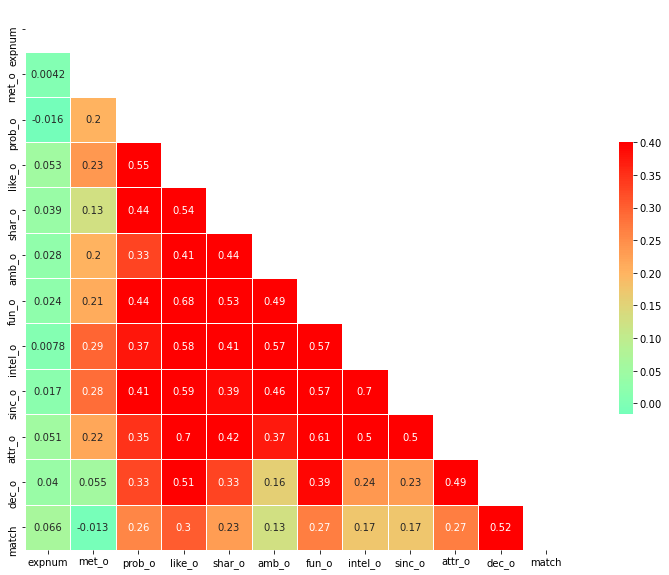

In [49]:
correlation = training_data.corr()

fig, axis = plt.subplots(figsize=(18,10))

axis.grid(False)
colormap = sns.diverging_palette(250, 30, as_cmap=True, n=200)
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, cmap='rainbow', mask=mask, vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)


In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = 'gini', n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
      
print('%f percent accuracy for RandomForestClassifier' %(accuracy_score(y_pred, y_test)*100) )
    

85.918854 percent accuracy for RandomForestClassifier


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
     
print('%f percent accuracy for DecisionTreeClassifier' %(count/len(y_pred) * 100))

83.054893 percent accuracy for DecisionTreeClassifier


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
 
print(model.coef_, len(X_test.columns), list(X_test.columns))        
print('%f percent accuracy for Logisticegression Model' %(count/len(y_pred) * 100))

[[ 4.40733815e-02 -4.19758144e-01  1.55657637e-01 -1.42301194e-02
   1.36459446e-02  2.36236719e-03  9.82179889e-02  8.04383218e-02
   5.87737045e-02 -8.30105265e-02  5.84439223e+00]] 11 ['expnum', 'met_o', 'prob_o', 'like_o', 'shar_o', 'amb_o', 'fun_o', 'intel_o', 'sinc_o', 'attr_o', 'dec_o']
85.978520 percent accuracy for Logisticegression Model


In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
       
print('%f percent accuracy for Gaussian Model' %(count/len(y_pred) * 100))

75.715990 percent accuracy for Logisticegression Model


In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
 
print(model.coef_)        
print('%f percent accuracy for Logisticegression Model' %(count/len(y_pred) * 100))

[[ 5.75440533e-02 -5.69477472e-01  1.47581177e-01 -5.61949433e-02
   2.82255652e-02 -2.21232766e-03  8.69391557e-02  4.83103265e-02
   4.14530722e-02 -5.69831322e-02  3.73384374e+00]]
85.680191 percent accuracy for Logisticegression Model


In [36]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
      
print('%f percent accuracy for Logisticegression Model' %(count/len(y_pred) * 100))

83.830549 percent accuracy for Logisticegression Model


In [38]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_test = list(y_test)

count = 0

for i in range(len(y_pred)):
    if y_test[i] == y_pred[i]:
        count += 1
       
print('%f percent accuracy for Logisticegression Model' %(count/len(y_pred) * 100))

85.202864 percent accuracy for Logisticegression Model
